In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_movies = pd.read_csv('data\cleaned_data\movies_data.csv')
print(df_movies.shape)
df_movies.head()

(81840, 9)


,wiki_id,name,release_date,revenue,runtime,languages,country,genres,plot
0,330,Actrius,1996.0,NaN,90.0,"Catalan , Spanish",Spain,"Drama, Comedy-drama",In order to prepare the role of an important o...
1,3217,Army of Darkness,1992.0,21502796.0,81.0,English,United States of America,"Cult, Horror, Stop motion, Costume drama, Acti...","After being pulled through a time portal, Ash ..."
2,3333,The Birth of a Nation,1915.0,50000000.0,190.0,"Silent film, English",United States of America,"Silent film, Indie, Costume drama, Epic, Black...",The film follows two juxtaposed families: the...
3,3746,Blade Runner,1982.0,33139618.0,116.0,"Japanese , Cantonese, English , German , Hunga...","United States of America, Hong Kong","Thriller, Cyberpunk, Science Fiction, Future n...","{{Hatnote}} In Los Angeles, November 2019, ret..."
4,3837,Blazing Saddles,1974.0,119500000.0,93.0,"Yiddish , English",United States of America,"Western, Satire, Comedy","In the American Old West of 1874, construction..."


In [3]:
oldest_film = df_movies.sort_values(by='release_date').iloc[0]
print(oldest_film)
index = oldest_film.name
df_movies = df_movies.drop(index)
df_movies.shape

wiki_id                                                 1082508
name                                      Roundhay Garden Scene
release_date                                             1888.0
revenue                                                     NaN
runtime                                                    0.03
languages                                           Silent film
country                                          United Kingdom
genres          Short Film, Silent film, Indie, Black-and-white
plot                                                        NaN
Name: 3966, dtype: object


(81839, 9)

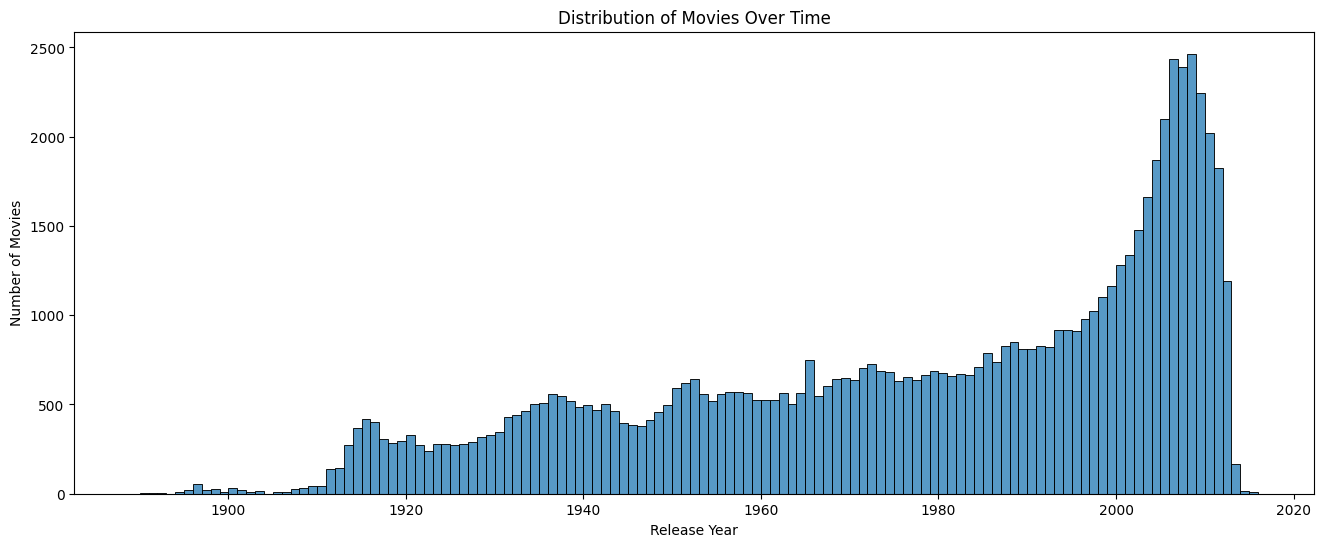

In [14]:
oldest_year = int(df_movies['release_date'].min())
youngest_year = int(df_movies['release_date'].max())
year_difference = youngest_year - oldest_year

plt.figure(figsize=(16, 6))
sns.histplot(df_movies['release_date'], binwidth=1)
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies Over Time')
plt.show()

In [15]:
american_movies_count = len(df_movies[df_movies['country'].str.contains('United States of America', na=False)])
print(f'The number of American movies is: {american_movies_count}')

The number of American movies is: 34408


In [8]:
american_movies_with_plot_count = len(df_movies[(df_movies['country'].str.contains('United States of America', na=False)) & (df_movies['plot'].notna())])
print(f'The number of American movies with a plot is: {american_movies_with_plot_count}')

The number of American movies with a plot is: 20788


In [9]:
war_movies_count = len(df_movies[df_movies['genres'].str.contains('War', na=False)])
print(f'The number of war movies is: {war_movies_count}')

The number of war movies is: 2659


In [10]:
percentage_american_movies = (american_movies_count / len(df_movies)) * 100
print(f'The percentage of American movies is: {percentage_american_movies:.2f}%')

The percentage of American movies is: 42.04%


In [11]:
social_themes = ["LGBT", "Gay", "Feminist", "Social problem", "Gay Interest", "Social issues", 'Law & Crime', 'racist', 'rights', 'oppression', 'protest', 'equality', 'revolution']
pattern = '|'.join(social_themes)
social_theme_movies_count = len(df_movies[df_movies['plot'].str.contains(pattern, case=False, na=False)])
social_theme_USA_movies_count = len(df_movies[(df_movies['plot'].str.contains(pattern, case=False, na=False)) & (df_movies['country'].str.contains('United States of America', na=False))])
print(f'The number of films with social themes in their plot is: {social_theme_USA_movies_count}')

The number of films with social themes in their plot is: 1413


In [13]:
economic_theme =  ["Business", "Finance", "Investing",  'poverty', 'Economic collapse', 'Unemployment', 'jobless','Inflation','Stock market','Bankruptcy','Debt']
pattern = '|'.join(economic_theme)
economic_theme_movies_count = len(df_movies[df_movies['plot'].str.contains(pattern, case=False, na=False)])
economic_theme_USA_movies_count = len(df_movies[(df_movies['plot'].str.contains(pattern, case=False, na=False)) & (df_movies['country'].str.contains('United States of America', na=False))])
print(f'The number of films with economic themes in their plot is: {economic_theme_movies_count}')
print(f'The number of american films with economic themes in their plot is: {economic_theme_USA_movies_count}')

The number of films with economic themes in their plot is: 4865
The number of american films with economic themes in their plot is: 2483


In [7]:
woman_right_themes = [
    "Feminist", "gender equality", "pay gap", "patriarchy", 
    "domestic violence", "sexual harassment", "suffragette", "intersectional"
]
pattern_woman_right = '|'.join(woman_right_themes)

df_woman_right_movies = df_movies[df_movies['plot'].str.contains(pattern_woman_right, case=False, na=False)]




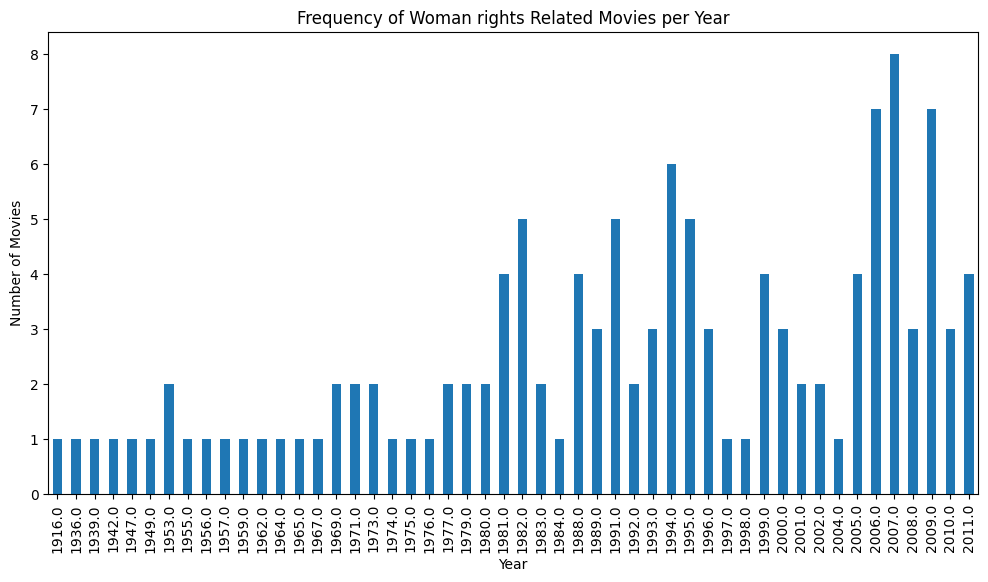

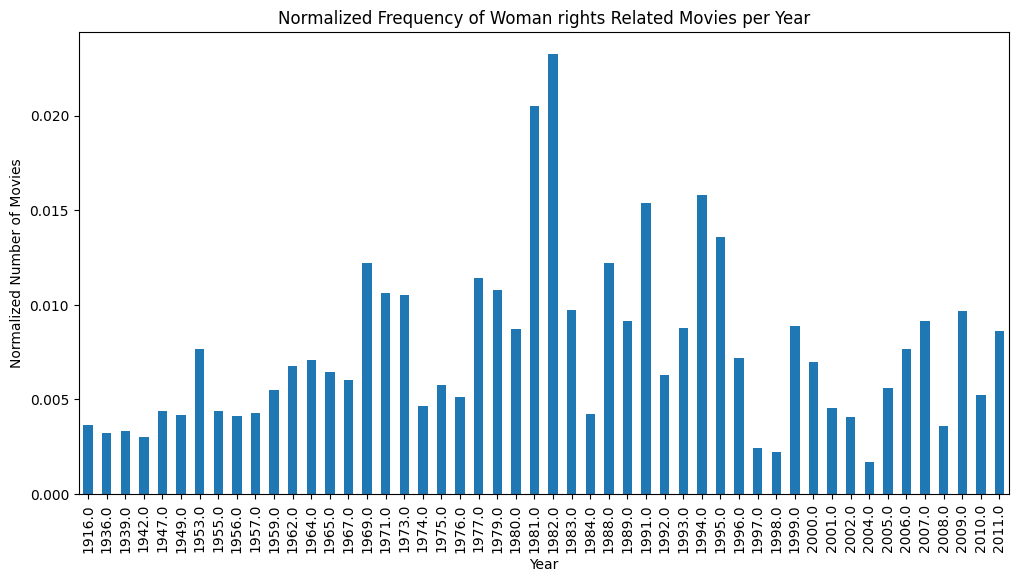

In [13]:
total_movies_per_year = df_movies[df_movies["country"] == "United States of America"]['release_date'].value_counts().sort_index()
woman_rights_movies_per_year = df_woman_right_movies['release_date'].value_counts().sort_index()

normalized_woman_rights_movies_per_year = woman_rights_movies_per_year / total_movies_per_year


woman_rights_movies_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Frequency of Woman rights Related Movies per Year')
plt.show()

normalized_woman_rights_movies_per_year = normalized_woman_rights_movies_per_year[normalized_woman_rights_movies_per_year > 0]

normalized_woman_rights_movies_per_year.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Year')
plt.ylabel('Normalized Number of Movies')
plt.title('Normalized Frequency of Woman rights Related Movies per Year')
plt.show()